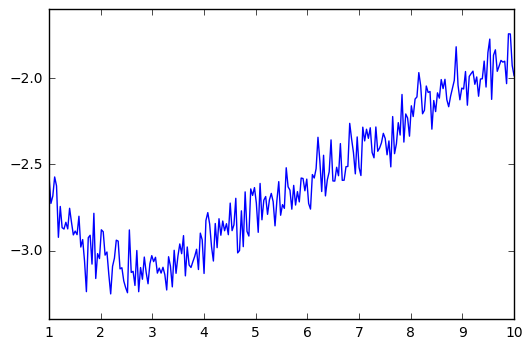

In [1]:
import numpy as np
import lmfit
import matplotlib.pyplot as plt
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0 * np.exp(-x / 2) - 5.0 * np.exp(-(x - 0.1) / 10.) + 0.1 * np.random.randn(len(x))
plt.plot(x, y)
plt.show()

In [2]:
p = lmfit.Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3., True))
def residual(p):
    v = p.valuesdict()
    return v['a1'] * np.exp(-x / v['t1']) + v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y

In [3]:
residual(p)

array([ 8.40305684,  8.48573585,  8.37447916,  8.19517714,  8.17973643,
        8.41175815,  8.16687205,  8.22517951,  8.16884086,  8.06624644,
        8.04200119,  7.86038913,  7.87943501,  7.89340461,  7.81152972,
        7.77320269,  7.60812595,  7.72932253,  7.62908129,  7.69768688,
        7.81977274,  7.45161486,  7.38334182,  7.49711562,  7.14934149,
        7.47547464,  7.27948574,  7.25710498,  7.03973421,  7.00100135,
        7.08766611,  7.02086573,  7.10327813,  7.16869212,  6.96181084,
        6.86808498,  6.717683  ,  6.67775702,  6.79430018,  6.7436586 ,
        6.77643152,  6.77201175,  6.75935525,  6.35265221,  6.55797842,
        6.5103847 ,  6.55170014,  6.30879281,  6.50832941,  6.3288866 ,
        6.35810593,  6.19108809,  6.24234887,  6.2710911 ,  6.11787371,
        6.03451655,  6.03325744,  5.97248512,  6.02924992,  5.96543801,
        5.96001542,  5.89258798,  5.9020669 ,  5.95775495,  5.73201182,
        5.75481207,  5.84278367,  5.59886424,  5.70149821,  5.57

In [21]:
mi = lmfit.minimize(residual, p,method='nelder')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in multiply


ValueError: The input contains nan values

In [19]:
lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)



[[Variables]]
    a1:   3.08667389 (init= 4)
    a2:   3.02988940 (init= 4)
    t1:   0.05911433 (init= 3)
    t2:   0.00085840 (init= 3)
[[Correlations]] (unreported correlations are <  0.500)


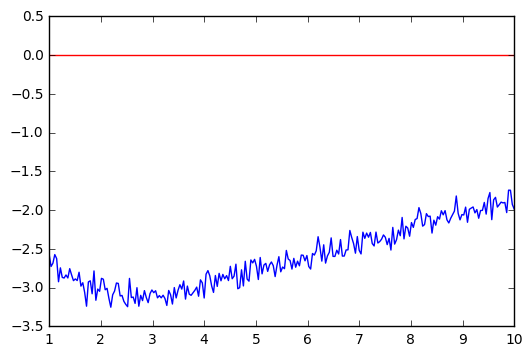

In [20]:

plt.plot(x, y)
plt.plot(x, residual(mi.params) + y, 'r')
plt.show()

In [11]:
lmfit.minimize?
